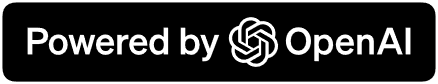

----
<br/>

|Platform|Link|
|---|---|
|X|<a href="https://x.com/dfinke"><img src="https://img.shields.io/twitter/follow/dfinke.svg?style=social&label=Follow%20%40dfinke"></a>|
|YouTube|<a href="https://youtube.com/@dougfinke"><img src="https://img.shields.io/youtube/channel/subscribers/UCP47ZkO5EDkoI2sr-3P4ShQ"></a>|

[OpenAI Documentation](https://platform.openai.com/docs/assistants/overview)

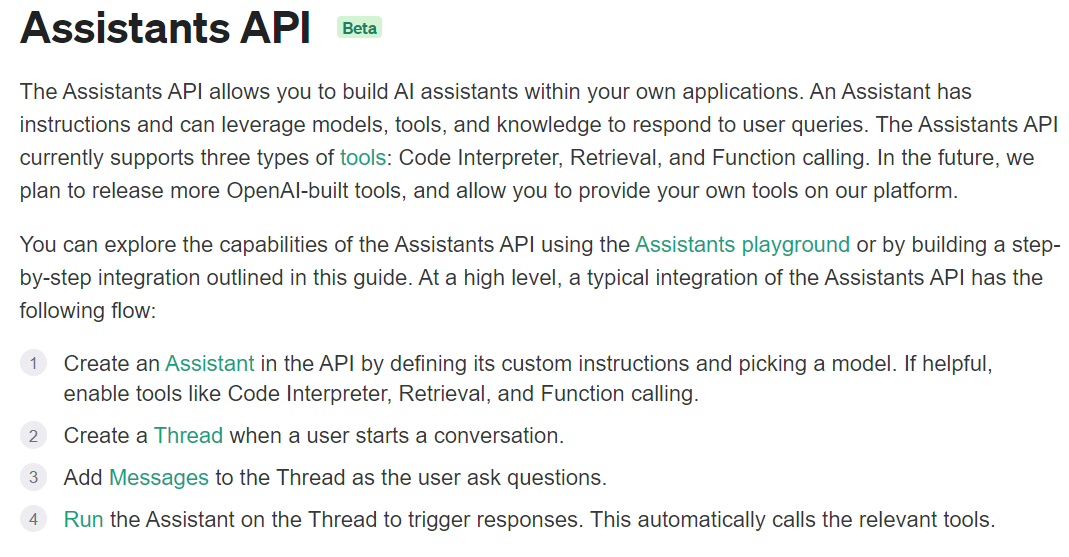

## Get and Set your OpenAI API Key

First, create an [OpenAI account](https://platform.openai.com/signup) or [sign in](https://platform.openai.com/login). Next, navigate to the [API key page](https://platform.openai.com/account/api-keys) and "Create new secret key", optionally naming the key. Make sure to save this somewhere safe and do not share it with anyone.

In [ ]:
$env:OpenAIKey = 'sk-xxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxx'

## Install PowerShell AI Assistant Module

`Install-Module -Name PowerShellAIAssistant`

In [1]:
$moduleName = "PowerShellAIAssistant"
$IsInstalled = (Get-Module -List $moduleName -ErrorAction SilentlyContinue) -ne $null

if ($IsInstalled) {
    Write-Host "$($moduleName) is already installed."
 } 
 else {
    Write-Host "$($moduleName) is not installed. Installing now..."
    Install-Module -Name $moduleName
}

PowerShellAIAssistant is already installed.


## Step 1: Create an Assistant

In [2]:
$assistantParams = @{
    name = "Math Tutor"
    instructions = "You are a personal math tutor. Answer questions briefly, in a sentence or less."
    model = "gpt-4-1106-preview"
}

$assistant = New-OAIAssistant @assistantParams

$assistant 


id           : asst_GbTDUfdH6FW5ehSGYq7xoaYr
object       : assistant
created_at   : 1708125196
name         : Math Tutor
description  : 
model        : gpt-4-1106-preview
instructions : You are a personal math tutor. Answer questions briefly, in a sentence or less.
tools        : {}
file_ids     : {}
metadata     : 



## Step 2: Create a Thread

In [3]:
$thread = New-OAIThread

$thread


id                              object created_at metadata
--                              ------ ---------- --------
thread_LHc4sAslOhcLV5PPjvMPYE3P thread 1708125199 



## Step 3: Add a Message to the Thread

In [4]:
$messageParams = @{
    threadid  = $thread.id
    role    = "user"
    content = "I need to solve the equation `3x + 11 = 14`. Can you help me?"
}

$message = New-OAIMessage @messageParams

$message


id           : msg_4OFeUTjcAxIGFIwgCyF0yEG1
object       : thread.message
created_at   : 1708125201
assistant_id : 
thread_id    : thread_LHc4sAslOhcLV5PPjvMPYE3P
run_id       : 
role         : user
content      : {@{type=text; text=}}
file_ids     : {}
metadata     : 



## Step 4: Get our Assistant to Respond

In [5]:
$runParams = @{
    threadId = $thread.id
    assistantId = $assistant.id
}

$run = New-OAIRun @runParams

$run


id           : run_6shEAfOkw2q2ZeWXJ91kgxG7
object       : thread.run
created_at   : 1708125205
assistant_id : asst_GbTDUfdH6FW5ehSGYq7xoaYr
thread_id    : thread_LHc4sAslOhcLV5PPjvMPYE3P
status       : queued
started_at   : 
expires_at   : 1708125805
cancelled_at : 
failed_at    : 
completed_at : 
last_error   : 
model        : gpt-4-1106-preview
instructions : You are a personal math tutor. Answer questions briefly, in a sentence or less.
tools        : {}
file_ids     : {}
metadata     : 
usage        : 



## Step 5: Poll for a Response

In [6]:
$run = Get-OAIRun -threadId $thread.id

$run.data


id           : run_6shEAfOkw2q2ZeWXJ91kgxG7
object       : thread.run
created_at   : 1708125205
assistant_id : asst_GbTDUfdH6FW5ehSGYq7xoaYr
thread_id    : thread_LHc4sAslOhcLV5PPjvMPYE3P
status       : completed
started_at   : 1708125205
expires_at   : 
cancelled_at : 
failed_at    : 
completed_at : 1708125207
last_error   : 
model        : gpt-4-1106-preview
instructions : You are a personal math tutor. Answer questions briefly, in a sentence or less.
tools        : {}
file_ids     : {}
metadata     : 
usage        : @{prompt_tokens=57; completion_tokens=33; total_tokens=90}



## Step 6: Get the Messages

In [7]:
$messages = Get-OAIMessage -ThreadId $thread.id -Order asc

$messages.data.content.text.value

"`nRaw Messages"
$messages.data

I need to solve the equation 3x + 11 = 14. Can you help me?
Yes, subtract 11 from both sides to get 3x = 3, then divide both sides by 3 to find x = 1.

Raw Messages

id           : msg_4OFeUTjcAxIGFIwgCyF0yEG1
object       : thread.message
created_at   : 1708125201
assistant_id : 
thread_id    : thread_LHc4sAslOhcLV5PPjvMPYE3P
run_id       : 
role         : user
content      : {@{type=text; text=}}
file_ids     : {}
metadata     : 

id           : msg_kXO2SNZsuGfx4apIuiQEgG9u
object       : thread.message
created_at   : 1708125206
assistant_id : asst_GbTDUfdH6FW5ehSGYq7xoaYr
thread_id    : thread_LHc4sAslOhcLV5PPjvMPYE3P
run_id       : run_6shEAfOkw2q2ZeWXJ91kgxG7
role         : assistant
content      : {@{type=text; text=}}
file_ids     : {}
metadata     : 



## Step 7: Optional - Remove the Assistant

In [8]:
Remove-OAIAssistant -Id $assistant.id


id                            object            deleted
--                            ------            -------
asst_GbTDUfdH6FW5ehSGYq7xoaYr assistant.deleted    True

